In [1]:
%pylab inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt('bmw.csv', delimiter=',')

In [3]:
y_train, x_train = data[:,0].astype(uint8), data[:,1:]

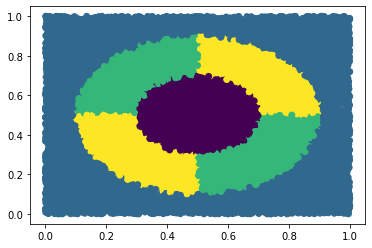

In [11]:
scatter(x_train[:,0], x_train[:,1], c=y_train)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle, class_weight

In [6]:
scaler=MinMaxScaler()

In [8]:
x_train = scaler.fit_transform(x_train,y_train)

In [10]:
x_train, y_train = shuffle(x_train, y_train)

(array([2101.,    0.,    0., 8157.,    0.,    0., 3041.,    0.,    0.,
        3085.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

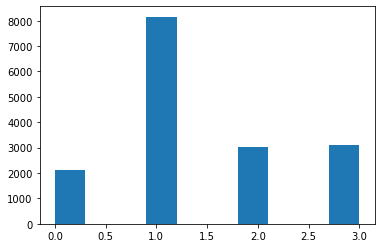

In [12]:
hist(y_train)

In [14]:
unique(y_train)

array([0, 1, 2, 3], dtype=uint8)

In [15]:
class_weight.compute_class_weight('balanced',classes=unique(y_train), y=y_train)

array([1.94954783, 0.5021454 , 1.34692535, 1.32771475])

In [19]:
for x in zip(unique(y_train),class_weight.compute_class_weight('balanced',classes=unique(y_train), y=y_train)):
    print(x)

(0, 1.9495478343645882)
(1, 0.5021453965918843)
(2, 1.3469253535021375)
(3, 1.3277147487844407)


In [21]:
class_weights = dict(zip(unique(y_train),class_weight.compute_class_weight('balanced',classes=unique(y_train), y=y_train)))

In [70]:
model = keras.models.Sequential()
model.add(layers.Dense(15,name="dense_1",input_shape=(2,), activation='relu'))
model.add(layers.Dense(10, name="dense_2", activation='relu'))
model.add(layers.Dense(4, name="output", activation='softmax'))

In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                45        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
output (Dense)               (None, 4)                 44        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(x=x_train,y=y_train,batch_size=16,epochs=10, validation_split=0.2,class_weight=class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 13107 samples, validate on 3277 samples
Epoch 1/10
13107/13107 [==============================] - 4s 303us/sample - loss: 1.3013 - accuracy: 0.3504 - val_loss: 1.2063 - val_accuracy: 0.3756
Epoch 2/10
13107/13107 [==============================] - 3s 247us/sample - loss: 1.0310 - accuracy: 0.5421 - val_loss: 0.8899 - val_accuracy: 0.6469
Epoch 3/10
13107/13107 [==============================] - 3s 250us/sample - loss: 0.7799 - accuracy: 0.6951 - val_loss: 0.6780 - val_accuracy: 0.7907
Epoch 4/10
13107/13107 [==============================] - 3s 240us/sample - loss: 0.5745 - accuracy: 0.8271 - val_loss: 0.4758 - val_accuracy: 0.8972
Epoch 5/10
13107/13107 [==============================] - 3s 250us/sample - loss: 0.4105 - accuracy: 0.8900 - val_loss: 0.3458 - val_accuracy: 0.9207
Epoch 6/10
13107/13107 [==============================] - 3s 245us/sample - loss: 0.3122 - accuracy: 0.9182 - val_loss: 0.2750 - val_accuracy: 0.9121
E

In [74]:
np.argmax(model.predict(array([0.6,0.1]).reshape(-1,2)))

1

In [75]:
model.evaluate(x_train,y_train)

16384/16384 [==============================] - 1s 65us/sample - loss: 0.1895 - accuracy: 0.9252


[0.18945434206398204, 0.9251709]